In [ ]:
!pip install rdkit torch torch-geometric pandas numpy scikit-learn tqdm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.1/63.1 kB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.2/35.2 MB 19.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 29.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 24.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 14.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 57.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 

Converting SMILES to graph...


Streaming output truncated to the last 5000 lines.
[20:24:37] DEPRECATION WARNING: please use GetValence(which=)
[20:24:37] DEPRECATION WARNING: please use GetValence(which=)
[20:24:37] DEPRECATION WARNING: please use GetValence(which=)
[20:24:37] DEPRECATION WARNING: please use GetValence(which=)
[20:24:37] DEPRECATION WARNING: please use GetValence(which=)
[20:24:37] DEPRECATION WARNING: please use GetValence(which=)
[20:24:37] DEPRECATION WARNING: please use GetValence(which=)
[20:24:37] DEPRECATION WARNING: please use GetValence(which=)
[20:24:37] DEPRECATION WARNING: please use GetValence(which=)
[20:24:37] DEPRECATION WARNING: please use GetValence(which=)
[20:24:37] DEPRECATION WARNING: please use GetValence(which=)
[20:24:37] DEPRECATION WARNING: please use GetValence(which=)
[20:24:37] DEPRECATION WARNING: please use GetValence(which=)
[20:24:37] DEPRECATION WARNING: please use GetValence(which=)
[20:24:37] DEPRECATION WARNING: please use GetValence(which=)
[20:24:37] DEPRECAT

Loaded 997 valid molecules.
Starting validation phase...
Epoch 1, Loss: 57.6404, R²: -0.2827, MAE: 3.9831
Epoch 2, Loss: 46.8426, R²: -0.1464, MAE: 3.9208
Epoch 3, Loss: 46.3214, R²: -0.2080, MAE: 3.8890
Epoch 4, Loss: 46.1784, R²: -0.1544, MAE: 3.8821
Epoch 5, Loss: 45.8801, R²: -0.1734, MAE: 3.8750
Epoch 6, Loss: 46.2636, R²: -0.1810, MAE: 3.8584
Epoch 7, Loss: 44.9059, R²: -0.1862, MAE: 3.8423
Epoch 8, Loss: 46.1300, R²: -0.1437, MAE: 3.7991
Epoch 9, Loss: 44.8241, R²: -0.1764, MAE: 3.7820
Epoch 10, Loss: 44.9011, R²: -0.0761, MAE: 3.7454
Epoch 11, Loss: 44.3823, R²: -0.0268, MAE: 3.6739
Epoch 12, Loss: 43.9739, R²: -0.0301, MAE: 3.6010
Epoch 13, Loss: 44.4167, R²: -0.0569, MAE: 3.5963
Epoch 14, Loss: 43.3825, R²: -0.0774, MAE: 3.5913
Epoch 15, Loss: 43.2173, R²: -0.0853, MAE: 3.5587
Epoch 16, Loss: 42.8003, R²: -0.1264, MAE: 3.5631
Epoch 17, Loss: 42.2314, R²: -0.0441, MAE: 3.5642
Epoch 18, Loss: 42.1439, R²: -0.0496, MAE: 3.5253
Epoch 19, Loss: 41.8311, R²: 0.0250, MAE: 3.5717
Epo

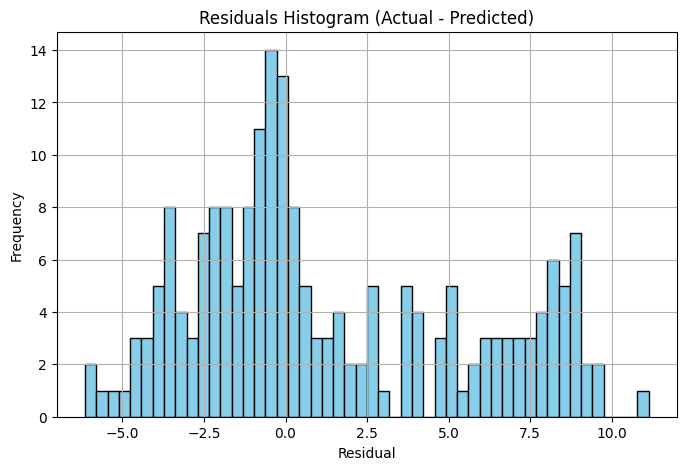

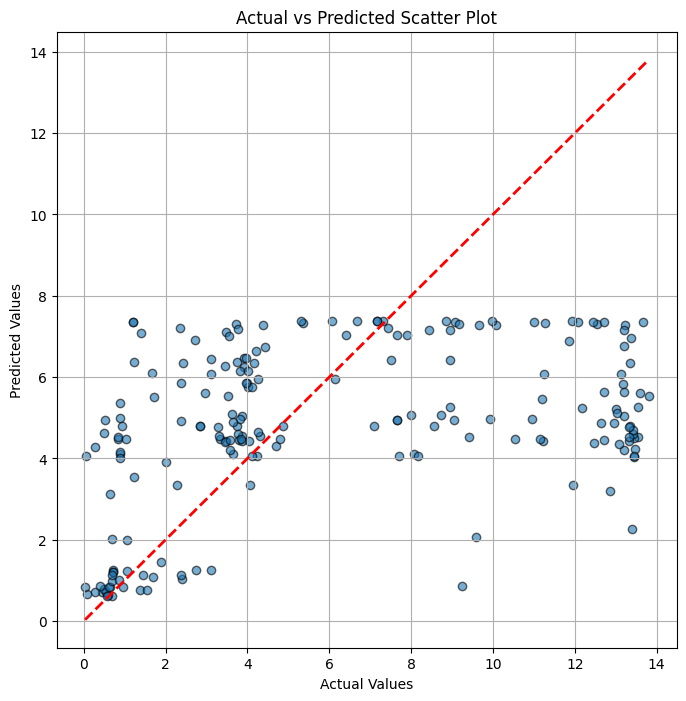

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch_geometric.data import Data
from torch_geometric.loader import DataLoader
from torch_geometric.nn import AttentiveFP
from rdkit import Chem
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error
import numpy as np
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt  # <-- Added for plotting

# ---------------------- Data Processing ----------------------

def load_data(file_path, smiles_column="SMILES", target_column="MDR1-MDCK2"):
    df = pd.read_csv(file_path).dropna(subset=[smiles_column, target_column])
    df = df[df[target_column] > 0]  # Remove zero/negative values
    df[target_column] = np.log1p(df[target_column])  # Log1p transformation
    return df, smiles_column, target_column

def smiles_to_graph(smiles, target):
    mol = Chem.MolFromSmiles(smiles)
    if mol is None:
        return None

    atom_features = []
    for atom in mol.GetAtoms():
        atomic_num = atom.GetAtomicNum()
        one_hot = [0] * 10
        one_hot[min(atomic_num, 9)] = 1
        features = one_hot + [
            atom.GetDegree() / 4.0,
            atom.GetFormalCharge() / 5.0,
            int(atom.GetHybridization()) / 6.0,
            float(atom.GetMass()) / 200.0,
            int(atom.GetIsAromatic()),
            atom.GetTotalNumHs() / 4.0,
            atom.GetExplicitValence() / 8.0
        ]
        atom_features.append(features)

    edge_index, edge_attr = [], []
    for bond in mol.GetBonds():
        start, end = bond.GetBeginAtomIdx(), bond.GetEndAtomIdx()
        bond_features = [
            int(bond.GetBondType() == Chem.rdchem.BondType.SINGLE),
            int(bond.GetBondType() == Chem.rdchem.BondType.DOUBLE),
            int(bond.GetBondType() == Chem.rdchem.BondType.TRIPLE),
            int(bond.GetBondType() == Chem.rdchem.BondType.AROMATIC),
            int(bond.GetIsConjugated())
        ]
        edge_index.extend([[start, end], [end, start]])
        edge_attr.extend([bond_features, bond_features])

    if not edge_index:
        return None

    return Data(
        x=torch.tensor(atom_features, dtype=torch.float),
        edge_index=torch.tensor(edge_index, dtype=torch.long).t().contiguous(),
        edge_attr=torch.tensor(edge_attr, dtype=torch.float),
        y=torch.tensor([target], dtype=torch.float)
    )

# ---------------------- Model Definition ----------------------

class EnhancedAttentiveFP(nn.Module):
    def __init__(self, node_feat_size, edge_feat_size, num_layers=4, num_timesteps=6, hidden_channels=256, dropout=0.25):
        super(EnhancedAttentiveFP, self).__init__()
        self.gnn = AttentiveFP(
            in_channels=node_feat_size,
            hidden_channels=hidden_channels,
            out_channels=hidden_channels,
            edge_dim=edge_feat_size,
            num_layers=num_layers,
            num_timesteps=num_timesteps,
            dropout=dropout
        )
        self.linear = nn.Linear(hidden_channels, hidden_channels)
        self.norm = nn.LayerNorm(hidden_channels)
        self.relu = nn.ReLU()
        self.output_layer = nn.Linear(hidden_channels, 1)

    def forward(self, x, edge_index, edge_attr, batch):
        x = self.gnn(x, edge_index, edge_attr, batch)
        x = self.linear(x)
        x = self.norm(x)
        x = self.relu(x)
        return self.output_layer(x).squeeze(1)


# ---------------------- Training Function ----------------------

def train_model(data, epochs=200, batch_size=64, lr=3e-4, patience=15, weight_decay=1e-5, grad_accum_steps=2):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    train_data, val_data = train_test_split(data, test_size=0.2, random_state=42)
    train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True, drop_last=True)
    val_loader = DataLoader(val_data, batch_size=batch_size, drop_last=False)

    num_node_features = data[0].x.size(1)
    num_edge_features = data[0].edge_attr.size(1)

    model = EnhancedAttentiveFP(num_node_features, num_edge_features, num_layers=4, num_timesteps=6).to(device)
    optimizer = optim.AdamW(model.parameters(), lr=lr, weight_decay=weight_decay)
    scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='max', factor=0.5, patience=5, min_lr=1e-6)
    criterion = nn.L1Loss()

    best_r2 = -float("inf")
    best_mae = float("inf")
    early_stop_counter = 0
    val_metrics = []

    print("Starting validation phase...")
    for epoch in range(epochs):
        model.train()
        total_loss = 0.0
        optimizer.zero_grad()

        for step, batch in enumerate(train_loader):
            batch = batch.to(device)
            out = model(batch.x, batch.edge_index, batch.edge_attr, batch.batch)
            loss = criterion(out, batch.y.view(-1))
            loss.backward()

            if (step + 1) % grad_accum_steps == 0 or step == len(train_loader) - 1:
                optimizer.step()
                optimizer.zero_grad()

            total_loss += loss.item()

        # Validation
        model.eval()
        preds, labels = [], []
        with torch.no_grad():
            for batch in val_loader:
                batch = batch.to(device)
                out = model(batch.x, batch.edge_index, batch.edge_attr, batch.batch)
                preds.extend(out.cpu().numpy())
                labels.extend(batch.y.view(-1).cpu().numpy())

        # Convert back from log1p space for evaluation metrics
        all_labels_exp = np.expm1(all_labels)
        all_preds_exp = np.expm1(all_preds)

        r2 = r2_score(all_labels_exp, all_preds_exp)
        mae = mean_absolute_error(all_labels_exp, all_preds_exp)
        val_metrics.append({
            'epoch': epoch + 1,
            'train_loss': total_loss / len(train_loader),
            'val_r2': r2,
            'val_mae': mae
        })

        print(f"Epoch {epoch+1}, Loss: {total_loss:.4f}, R²: {r2:.4f}, MAE: {mae:.4f}")

        scheduler.step(r2)

        if r2 > best_r2 or (r2 == best_r2 and mae < best_mae):
            best_r2 = r2
            best_mae = mae
            early_stop_counter = 0
            torch.save(model.state_dict(), "best_model_val_MDR1-MDCK2phase.pth")
        else:
            early_stop_counter += 1
            if early_stop_counter >= patience:
                print("Early stopping.")
                break

    pd.DataFrame(val_metrics).to_csv("validation_MDR1-MDCK2metrics.csv", index=False)

    # Full training
    print("\nTraining on full dataset...")
    full_loader = DataLoader(data, batch_size=batch_size, shuffle=True)
    best_loss = float("inf")
    early_stop_counter = 0
    full_metrics = []

    for epoch in range(epochs // 2):
        model.train()
        total_loss = 0.0
        optimizer.zero_grad()

        for step, batch in enumerate(full_loader):
            batch = batch.to(device)
            out = model(batch.x, batch.edge_index, batch.edge_attr, batch.batch)
            loss = criterion(out, batch.y.view(-1))
            loss.backward()

            if (step + 1) % grad_accum_steps == 0 or step == len(full_loader) - 1:
                optimizer.step()
                optimizer.zero_grad()

            total_loss += loss.item()

        avg_loss = total_loss / len(full_loader)
        full_metrics.append({'epoch': epoch + 1, 'train_loss': avg_loss})
        print(f"Full Data Epoch {epoch+1}, Loss: {avg_loss:.4f}")

        if avg_loss < best_loss:
            best_loss = avg_loss
            early_stop_counter = 0
            torch.save(model.state_dict(), "best_model_MDR1-MDCK2full.pth")
        else:
            early_stop_counter += 1
            if early_stop_counter >= patience:
                print("Early stopping in full training.")
                break

    pd.DataFrame(full_metrics).to_csv("full_training_MDR1-MDCK2metrics.csv", index=False)

    # --- Script and save the trained model ---
    scripted_model = torch.jit.script(model)
    scripted_model.save('model_scripted.pt')
    print("Model has been scripted and saved as 'model_MDR1-MDCK2scripted.pt'")

    return model, val_data

# ---------------------- Run Training ----------------------

if __name__ == '__main__':
    file_path = "/content/MDR1_MDCK2_MERGED.csv"
    df, smiles_col, target_col = load_data(file_path)

    print("Converting SMILES to graph...")
    graph_data = [smiles_to_graph(row[smiles_col], row[target_col]) for _, row in tqdm(df.iterrows(), total=len(df))]
    graph_data = [g for g in graph_data if g is not None]
    print(f"Loaded {len(graph_data)} valid molecules.")

    trained_model, val_data = train_model(graph_data)

    # ---------------------- Plotting Residual Histogram and Actual vs Predicted ----------------------

    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    trained_model.eval()

    val_loader = DataLoader(val_data, batch_size=64, shuffle=False)

    actuals = []
    predictions = []

    with torch.no_grad():
        for batch in val_loader:
            batch = batch.to(device)
            preds = trained_model(batch.x, batch.edge_index, batch.edge_attr, batch.batch)
            predictions.extend(preds.cpu().numpy())
            actuals.extend(batch.y.view(-1).cpu().numpy())

    actuals = np.array(actuals)
    predictions = np.array(predictions)
    residuals = actuals - predictions

    # Residual Histogram
    plt.figure(figsize=(8, 5))
    plt.hist(residuals, bins=50, color='skyblue', edgecolor='black')
    plt.title("Residuals Histogram (Actual - Predicted)")
    plt.xlabel("Residual")
    plt.ylabel("Frequency")
    plt.grid(True)
    plt.savefig("residual_histogram.png")
    plt.show()

    # Actual vs Predicted Scatter Plot
    plt.figure(figsize=(8, 8))
    plt.scatter(actuals, predictions, alpha=0.6, edgecolors='k')
    plt.plot([actuals.min(), actuals.max()], [actuals.min(), actuals.max()], 'r--', lw=2)  # y=x line
    plt.title("Actual vs Predicted Scatter Plot")
    plt.xlabel("Actual Values")
    plt.ylabel("Predicted Values")
    plt.grid(True)
    plt.savefig("actual_vs_predicted.png")
    plt.show()
